## Perth Basin Case Study using Loop2Flopy


In [1]:
import numpy as np
import pandas as pd
import numbers
import LoopStructural



### Importing Borehole Data


In [2]:
bore_info = pd.read_excel(
    "../Geological_data/Dwer_data\Formation picks.xls", sheet_name="bore_info"
)

strat_info = pd.read_excel(
    "../Geological_data/Dwer_data\Formation picks.xls", sheet_name="strat_info"
)

bore_info

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.00,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.00,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.00,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.00,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.00,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,376443.0,6534012.0,Hydrogeology of the North Gnangara Mound,NG12A,37.39,37,-,-,-,-,...,-,111,-,-,-,-,-,-,-,NaN
422,383023.0,6534943.0,Hydrogeology of the North Gnangara Mound,NG13A,50.23,42,-,-,-,-,...,-,179,-,-,-,-,-,-,-,NaN
423,379507.0,6530558.0,Hydrogeology of the North Gnangara Mound,NG14A,52.17,54,-,-,-,-,...,-,229,252,269,-,-,-,-,311,NaN
424,NaN,NaN,Hydrogeology of the North Gnangara Mound,NGS1,NaN,46,-,-,-,-,...,-,-,-,-,-,-,84,-,-,NaN


### Filter data

Crop to desired area and delete columns of less than 2 data points


In [3]:
df = bore_info.copy()
# x0, x1, y0, y1, z0, z1 = 355000, 402000, 6522000, 6534000, -1200, 200
x0, x1, y0, y1, z0, z1 = 355000, 402000, 6490000, 6540000, -1200, 200
, -1200, 200 # Whole Block
df = df.loc[(df["Northing"] >= y0)]
df = df.loc[(df["Northing"] <= y1)]
# df = df.loc[(df['Easting'] <= x1)]
df = df.drop(["Source"], axis=1)
# df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
# I think we need to keep this general so that we can apply it everywhere...
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,394957.0,6539787.0,KR1,216.00,-,-,-,-,-,-,...,-,-,-,-,-,303,-,-,-,-
1,394957.0,6539787.0,KR5,216.00,3,-,-,-,-,-,...,155,216,-,-,-,220,-,-,-,-
2,397865.0,6539765.0,EXP2,230.00,2,-,-,-,-,-,...,116,155,-,-,-,-,-,-,-,-
3,406858.0,6538132.0,CUL1,179.00,3,-,-,-,-,-,...,313,-,-,-,-,-,-,-,-,-
4,404259.0,6537999.0,PRI1,208.00,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,389013.0,6524545.0,NG9A,67.67,53,-,-,-,-,-,...,-,-,-,-,-,-,-,-,311,NaN
95,386171.0,6519336.0,NG10A,66.47,62,-,-,-,-,-,...,-,144,153,-,189,-,-,-,311,NaN
96,376443.0,6534012.0,NG12A,37.39,37,-,-,-,-,-,...,-,111,-,-,-,-,-,-,-,NaN
97,383023.0,6534943.0,NG13A,50.23,42,-,-,-,-,-,...,-,179,-,-,-,-,-,-,-,NaN


<bound method NDFrame.keys of      Easting   Northing     ID  Ground  TQ  Tr Tkm  Tk Tkc Kcl  ... Kwlp Kwlw  \
0   394957.0  6539787.0    KR1  216.00   -   -   -   -   -   -  ...    -    -   
1   394957.0  6539787.0    KR5  216.00   3   -   -   -   -   -  ...  155  216   
2   397865.0  6539765.0   EXP2  230.00   2   -   -   -   -   -  ...  116  155   
3   406858.0  6538132.0   CUL1  179.00   3   -   -   -   -   -  ...  313    -   
4   404259.0  6537999.0   PRI1  208.00   -   -   -   -   -   -  ...    -    -   
..       ...        ...    ...     ...  ..  ..  ..  ..  ..  ..  ...  ...  ...   
94  389013.0  6524545.0   NG9A   67.67  53  -   -   -   -   -   ...   -    -    
95  386171.0  6519336.0  NG10A   66.47  62  -   -   -   -   -   ...   -   144   
96  376443.0  6534012.0  NG12A   37.39  37  -   -   -   -   -   ...   -   111   
97  383023.0  6534943.0  NG13A   50.23  42  -   -   -   -   -   ...   -   179   
98  379507.0  6530558.0  NG14A   52.17  54  -   -   -   -   -   ...   -   229  

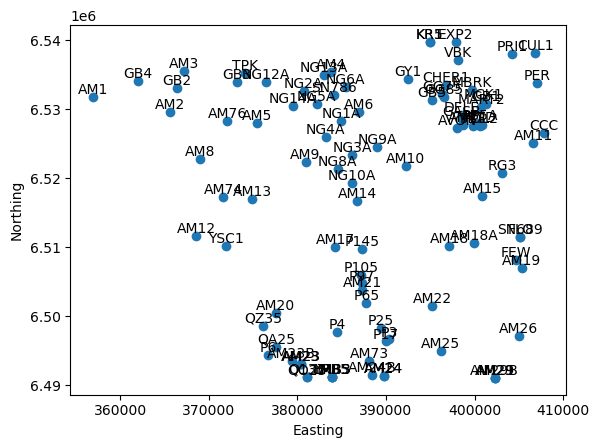

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print(df.keys)

# Plan of data points
plt.scatter(df.Easting, df.Northing)
plt.xlabel("Easting")
plt.ylabel("Northing")
i = 0
for xi, yi in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va="bottom", ha="center")
    i += 1
# plt.plot([fx1, fx2], [fy1, fy2])
# plt.plot(fault_center[0], fault_center[1], 'o')
# plt.xlim(x0,x1)
# plt.ylim(y0,y1)

In [5]:
lithcodes = list(df.columns.values[3:])  # Make a list of formations
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
print(lithcodes)

['Ground', 'TQ', 'Tr', 'Tkm', 'Tk', 'Tkc', 'Kcl', 'Kcp', 'Kcg', 'Kcm', 'Kcom', 'Kcok', 'Kcoh', 'Kwlp', 'Kwlw', 'Kwlm', 'Kws', 'Kwg', 'Kpc', 'Kps', 'Kpo', 'Jy', 'Jc']


In [6]:
strat = []
vdum = [
    38,
    -10,
    -52,
    -124,
    -320,
    -385,
    -435,
    -463,
    -472,
    -494,
    -549,
    -591,
    -619,
    -666,
    -822,
    -881,
    -963,
    -1043,
    -1818,
    -2090,
    -2148,
    -3148,
    -4148,
]

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i - 1
    val = vdum[i]
    sequence = strat_info.loc[strat_info["unit"] == lith, "sequence"].item()
    R = strat_info.loc[strat_info["unit"] == lith, "R"].item() / 255
    G = strat_info.loc[strat_info["unit"] == lith, "G"].item() / 255
    B = strat_info.loc[strat_info["unit"] == lith, "B"].item() / 255
    strat.append(
        [index, lithid, lith, sequence, val, [round(R, 2), round(G, 2), round(B, 2)]]
    )
strat = pd.DataFrame(strat)
strat.columns = ["index", "lithid", "lithcode", "sequences", "vals", "color"]
strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,38,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,-10,"[1.0, 1.0, 0.0]"
2,2,1,Tr,Tertiary,-52,"[0.73, 0.6, 0.58]"
3,3,2,Tkm,Tertiary,-124,"[1.0, 0.6, 0.2]"
4,4,3,Tk,Tertiary,-320,"[1.12, 0.32, 0.16]"
5,5,4,Tkc,Tertiary,-385,"[1.0, 0.6, 0.2]"
6,6,5,Kcl,Coolyena,-435,"[0.67, 0.8, 0.0]"
7,7,6,Kcp,Coolyena,-463,"[0.77, 0.84, 0.61]"
8,8,7,Kcg,Coolyena,-472,"[0.67, 0.85, 0.6]"
9,9,8,Kcm,Coolyena,-494,"[0.67, 0.78, 0.71]"


### Make lithology table for Loop

#### A brief description of what we are trying to do.

So what we are trying to represent is the following

Feature 1:

Sky
Quaternary formations (superficial aquifer)

Quaternary unconformity.

As the Quaternary formation is everywhere, we can use this feature to develop the unconformity at the base of "TQ".

Feature 2:
Tertiary. okay not all are present here, but, generally no unconformities (you don't find a gap in the sequences)

Feature 3
Tertiary unconformity - Tertiary not always present, so create a seperate frature that has "zero" at the base of the deepest formation of tertiary age or younger.

Feature 4
Issue identified!!!!

Okay - usually you have Gingin / poison Hill Greensand, but not both.

# JP1 - Are these effectively the same but named twice of fundamentally different?

# JP2 - how to break up the coolyena

Feature 5
Coolyena unconfirmit -Coolyena not always present, so create a seperate frature that has "zero" at the base ofHenley sandstone or younger.

Feature 6
Warnbro

# JP3 Should we break this up into leederville and then SPS and Gage (some exceptions - Waneroo missing)

Feature 7
Warnbro unconformity (applied as before)

# JP4 Do you have coordinates for NGS1 and NGS2 (hit Parmelia)

Feature 8
Yaragadee / parmelia just not enough data - KPS on it's own KPO Carnac?

# JP5 NGG bores Leederville into uniits? (in cross sections but not in WIR)

# JP6 Petroleum bore gamma interpretation?


In [7]:
df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,394957.0,6539787.0,KR1,216.00,-,-,-,-,-,-,...,-,-,-,-,-,303,-,-,-,-
1,394957.0,6539787.0,KR5,216.00,3,-,-,-,-,-,...,155,216,-,-,-,220,-,-,-,-
2,397865.0,6539765.0,EXP2,230.00,2,-,-,-,-,-,...,116,155,-,-,-,-,-,-,-,-
3,406858.0,6538132.0,CUL1,179.00,3,-,-,-,-,-,...,313,-,-,-,-,-,-,-,-,-
4,404259.0,6537999.0,PRI1,208.00,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,389013.0,6524545.0,NG9A,67.67,53,-,-,-,-,-,...,-,-,-,-,-,-,-,-,311,NaN
95,386171.0,6519336.0,NG10A,66.47,62,-,-,-,-,-,...,-,144,153,-,189,-,-,-,311,NaN
96,376443.0,6534012.0,NG12A,37.39,37,-,-,-,-,-,...,-,111,-,-,-,-,-,-,-,NaN
97,383023.0,6534943.0,NG13A,50.23,42,-,-,-,-,-,...,-,179,-,-,-,-,-,-,-,NaN


In [8]:
# Okay, let me vocalise, or type, what is in my mind...
# So we treat the four parts as their own thing...
# then we make the unconformities feature names....
# Also, on the phone with JP, he said the last number is the end of hole (EOH)


data_list = df.values.tolist()  # Turn data into a list of lists
formatted_data = []
for i in range(len(data_list)):  # iterate for each row
    end = False
    # okay, first we will establish the max value (i.e. the end of the hole)
    stuff = []
    for j in range(3, 25, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            stuff.append(data_list[i][j])

    EOH = max(stuff)
    print(EOH)

    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]
    # First channp.nan, np.nan, np.nange - we can get the norms from the geophys data...
    gx, gy, gz = 0.0, 0.0, 1.0  # np.nan, np.nan,np.nan

    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append(
        [
            boreid,
            easting,
            northing,
            groundlevel,
            val,
            "Ground",
            "Quaternary",
            gx,
            gy,
            gz,
        ]
    )  # eventually we cn get this from a dem...
    current_bottom = np.copy(groundlevel)

    # okay... lets see if the TQ boundary exists...
    # JP question - Say in SN786, how you have logged it, do you mean the Pinjar is at the surface?
    # thought 2 - we will just have a DEM eventaully I imagine... so ground could be an unconformity if we have something other than TQ at the surface?
    # but in the current framework:
    if isinstance(data_list[i][4], numbers.Number) == True:
        bottom = groundlevel - float(data_list[i][4])  # Ground surface - TQ (mbgl)
        val = strat.vals[1]  # designated isovalue
        lithid = lithcodes[1]  # lithology id
        feat_name = strat.sequences[1]  # sequence name
        formatted_data.append(
            [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
        )
        current_bottom = np.copy(bottom)

    # I know, I know, there isn't any of the tertiary one here, but in being thorough...

    for j in range(5, 9, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom = groundlevel - float(
                    data_list[i][j]
                )  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 3]  # designated isovalue
            else:
                bottom = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 4]  # designated isovalue
                end = True

            lithid = lithcodes[j - 3]  # lithology id
            feat_name = strat.sequences[j - 3]  # sequence name
            formatted_data.append(
                [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
            )
            current_bottom = np.copy(bottom)

    # Teriary unconformity
    if end == False:
        bottom = np.copy(current_bottom)
        val = 0.0
        lithid = "Tert_base"
        feat_name = "Tertiary_unconformity"
        formatted_data.append(
            [boreid, easting, northing, bottom, val, lithid, feat_name, 0.0, 0.0, 1.0]
        )

    # Fighting, out of the perth Basin by way of San Jose Calfornia: The Coolyeena Formation!!!!

    for j in range(9, 16, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom = groundlevel - float(
                    data_list[i][j]
                )  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 3]  # designated isovalue
            else:
                bottom = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 4]  # designated isovalue
                end = True
            lithid = lithcodes[j - 3]  # lithology id
            feat_name = strat.sequences[j - 3]  # sequence name
            formatted_data.append(
                [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
            )
            current_bottom = np.copy(bottom)

    # Unconfiormity
    if end == False:
        bottom = np.copy(current_bottom)
        val = 0.0
        lithid = "Cool_base"
        feat_name = "CoolUC"
        formatted_data.append(
            [boreid, easting, northing, bottom, val, lithid, feat_name, 0.0, 0.0, 1.0]
        )

    for j in range(16, 21, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom = groundlevel - float(
                    data_list[i][j]
                )  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 3]  # designated isovalue
                # else:
                # bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                # val       = strat.vals[j-4]                      # designated isovalue
                # end = True
                lithid = lithcodes[j - 3]  # lithology id
                feat_name = strat.sequences[j - 3]  # sequence name
                formatted_data.append(
                    [
                        boreid,
                        easting,
                        northing,
                        bottom,
                        val,
                        lithid,
                        feat_name,
                        gx,
                        gy,
                        gz,
                    ]
                )
                current_bottom = np.copy(bottom)
    # Unconfiormity
    if end == False:
        bottom = np.copy(current_bottom)
        val = 0.0
        lithid = "Warn_base"
        feat_name = "WarnUC"
        formatted_data.append(
            [boreid, easting, northing, bottom, val, lithid, feat_name, 0.0, 0.0, 1.0]
        )

    gx, gy, gz = 0.0, 0.0, 1.0
    for j in range(21, 26, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom = groundlevel - float(
                    data_list[i][j]
                )  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 3]  # designated isovalue
            else:
                bottom = groundlevel - EOH  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 4]  # designated isovalue
            lithid = lithcodes[j - 3]  # lithology id
            feat_name = strat.sequences[j - 3]  # sequence name
            formatted_data.append(
                [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
            )
            current_bottom = np.copy(bottom)

# geophys data
# Thomas_Yaragadee base
X = np.loadtxt(
    "../Geological_data/Geophysical_data/Thomas_transect/Yar_base_thomas.dat"
)
for i in range(len(X)):
    val = vdum[-2]
    feat_name = strat.sequences[21]
    lithid = lithcodes[21]
    formatted_data.append(
        ["seis", X[i, 0], X[i, 1], X[i, 2], val, lithid, feat_name, gx, gy, gz]
    )

"""#Thomas Break up uncomformity 
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/BU_thomas.dat')
for i in range(len(X)):
    val = 0.
    lithid = 'Warn_base'
    feat_name = 'WarnUC'
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz]) 

#Thomas Top_SPS
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/Top_SPS_thomas.dat')
for i in range(len(X)):
    val = vdum[16]
    feat_name = strat.sequences[16] 
    lithid    = lithcodes[16]
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz])"""

data = pd.DataFrame(formatted_data)
data.columns = [
    "ID",
    "X",
    "Y",
    "Z",
    "val",
    "lithcode",
    "feature_name",
    "gx",
    "gy",
    "gz",
]

303
220
230.0
313
208.0
261
729
549
168
762
535
719
185.0
135
509
134
275
135.0
680
100.0
517
270
316
188
881
300
254
189
647
317
302
721
180
267
171
231
244
810
810
303
298
201
784
405
798
810
838
253
259
676
504
300
301
206
154
802
198
400
464
117
610
467
238
220
519
674
542
589
221
605
604
415.99999391174316
620
470
469.9995138397216
903.8000075683592
908
907.9999182739257
408.2
1397.2
1281
1358.3
1347
204
753
739.6002145996092
757.0005227966308
311
138
251
305
306
335
299
311
311
111
179
311


#### Fault stuff


In [10]:
# The Bado
fx1, fx2 = 373786, 373439
fy1, fy2 = 6528191, 6517059
fz = -800  # [-200,-500]

fault_azimuth = 90 - np.rad2deg(np.arctan(np.abs(fy2 - fy1) / np.abs(fx2 - fx1)))
fault_center = [fx1 + (fx2 - fx1) / 2, fy1 + (fy2 - fy1) / 2, fz]
fault_max_disp = 500.0  # 200?
fault_slip_vector = [0, 0, 1]
major_axis = (
    100000  # np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
)
minor_axis = 100000  # Fault_influence - orthogonal to fault
intermediate_axis = 0  # fault_vertical_radius
strike, dip = fault_azimuth, 270

# Make cloud of points along fault plane
nh = 50  # points  in x/y plane
x_array, y_array = [], []  # arrays to create points along fault
x_array.append(fx1)
y_array.append(fy1)
for i in range(nh - 2):
    x_array.append(fx1 + (i + 1) * (fx2 - fx1) / (nh - 1))
    y_array.append(fy1 + (i + 1) * (fy2 - fy1) / (nh - 1))
x_array.append(fx2)
y_array.append(fy2)

z_array = np.arange(-1000, 0, 50)
nv = len(z_array)  # points in z plane

from LoopStructural.utils import strikedip2vector as strike_dip_vector

nx, ny, nz = strike_dip_vector([strike], [dip])[0]
print(nx, ny, nz)

fault_plane_3d = []
for v in range(nv):  # vertical points
    for h in range(nh):  # horizontal points
        x, y, z = x_array[h], y_array[h], z_array[v]
        fault_plane_3d.append((x, y, z))
        df_new_row = pd.DataFrame.from_records(
            {
                "X": [x],
                "Y": [y],
                "Z": [z],
                "val": [0.0],
                "feature_name": ["Fault"],
                "nx": [nx],
                "ny": [ny],
                "nz": [nz],
            }
        )
        data = pd.concat([data, df_new_row], ignore_index=True)

## ADD FAULT (this chunk given to me directly by Lachlan Grose to make an ellipsoid fault)
from LoopStructural.modelling.features.fault._fault_function import (
    CubicFunction,
    FaultDisplacement,
    Composite,
)

hw = CubicFunction()
hw.add_cstr(0, 1)
hw.add_grad(0, 0)
hw.add_cstr(1, 0)
hw.add_grad(1, 0)
hw.add_max(1)
fw = CubicFunction()
fw.add_cstr(0, -1)
fw.add_grad(0, 0)
fw.add_cstr(-1, 0)
fw.add_grad(-1, 0)
fw.add_min(-1)
gyf = CubicFunction()
gyf.add_cstr(-1, 0)
gyf.add_cstr(1, 0)
gyf.add_cstr(-0.2, 1)
gyf.add_cstr(0.2, 1)
gyf.add_grad(0, 0)
gyf.add_min(-1)
gyf.add_max(1)
gzf = CubicFunction()
gzf.add_cstr(-1, 0)
gzf.add_cstr(1, 0)
gzf.add_cstr(-0.2, 1)
gzf.add_cstr(0.2, 1)
gzf.add_grad(0, 0)
gzf.add_min(-1)
gzf.add_max(1)
gxf = Composite(hw, fw)
fault_displacement = None
fault_displacement = FaultDisplacement(gx=gxf, gy=gyf, gz=gzf)
faultfunction = fault_displacement

-0.9995145257373308 0.031156264860838546 -1.8369701987210297e-16


In [12]:
for lith in lithcodes:
    filtered_df = data[data.lithcode == lith]
    print(
        "\n Lithology = ",
        lith,
        "\n\n",
        filtered_df[
            ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
        ],
    )

filtered_df = data[data.lithcode == "Tert_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)
filtered_df = data[data.lithcode == "Cool_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)
filtered_df = data[data.lithcode == "Warn_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)


 Lithology =  Ground 

          ID         X          Y      Z   val lithcode feature_name   gx   gy  \
0       KR1  394957.0  6539787.0  216.0  38.0   Ground   Quaternary  0.0  0.0   
5       KR5  394957.0  6539787.0  216.0  38.0   Ground   Quaternary  0.0  0.0   
16     EXP2  397865.0  6539765.0  230.0  38.0   Ground   Quaternary  0.0  0.0   
28     CUL1  406858.0  6538132.0  179.0  38.0   Ground   Quaternary  0.0  0.0   
38     PRI1  404259.0  6537999.0  208.0  38.0   Ground   Quaternary  0.0  0.0   
...     ...       ...        ...    ...   ...      ...          ...  ...  ...   
1044   NG9A  389013.0  6524545.0  67.67  38.0   Ground   Quaternary  0.0  0.0   
1051  NG10A  386171.0  6519336.0  66.47  38.0   Ground   Quaternary  0.0  0.0   
1061  NG12A  376443.0  6534012.0  37.39  38.0   Ground   Quaternary  0.0  0.0   
1067  NG13A  383023.0  6534943.0  50.23  38.0   Ground   Quaternary  0.0  0.0   
1073  NG14A  379507.0  6530558.0  52.17  38.0   Ground   Quaternary  0.0  0.0   

  

### Create Geomodel


In [14]:
from LoopStructural import GeologicalModel

origin = np.array([x0, y0, z0]).astype(float)
maximum = np.array([x1, y1, z1]).astype(float)

geomodel_strat_column = GeologicalModel(
    origin, maximum
)  # Made using unconformities and a strat column
geomodel_strat_column.data = data

In [15]:
origin, maximum

(array([ 3.55e+05,  6.49e+06, -1.20e+03]),
 array([4.02e+05, 6.54e+06, 2.00e+02]))

In [16]:
np.isnan(origin)

array([False, False, False])

In [17]:
data["Z"] = data["Z"].astype(float)

### Add surfaces


In [31]:
origin = np.array([3.55e05, 6.49e06, -1.20e03])
maximum = np.array([4.02e05, 6.54e06, 2.00e02])
# data = pd.read_csv("ls_data.csv")

geomodel_strat_column = GeologicalModel(
    origin, maximum
)  # Made using unconformities and a strat column
geomodel_strat_column.data = data


Quat_1 = geomodel_strat_column.create_and_add_foliation(
    "Quaternary", nelements=1e4, buffer=0.1
)

UC1 = geomodel_strat_column.add_unconformity(geomodel_strat_column["Quaternary"], -10)


Tert_1 = geomodel_strat_column.create_and_add_foliation(
    "Tertiary", nelements=1e4, buffer=0.1
)


TertUC_1 = geomodel_strat_column.create_and_add_foliation(
    "Tertiary_unconformity", nelements=1e4, buffer=0.1
)

UC2 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["Tertiary_unconformity"], 0
)


Cool_1 = geomodel_strat_column.create_and_add_foliation(
    "Coolyena", nelements=1e4, buffer=0.1
)


fault_slip_vector = [0, 0, 1]
major_axis = (
    100000  # np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
)
minor_axis = 100000  #

CoolUC_1 = geomodel_strat_column.create_and_add_foliation(
    "CoolUC", nelements=1e4, buffer=0.1
)
UC3 = geomodel_strat_column.add_onlap_unconformity(geomodel_strat_column["CoolUC"], 0)
Fault_1 = geomodel_strat_column.create_and_add_fault(
    "Fault",
    displacement=500.0,
    fault_slip_vector=fault_slip_vector,
    # fault_center = fault_center,
    minor_axis=10000,  # minor_axis,  # fault_influence
    # major_axis = major_axis, # fault_extent
    # intermediate_axis = intermediate_axis, # fault_vertical_radius
    # aultfunction = faultfunction, #faultfunction in routines.ipynb
    # nelements=4000, steps=4, interpolatortype="FDI", buffer=0.3, solver='pyamg',
    force_mesh_geometry=False,
    nelements=1e3,
)

Warnbro_1 = geomodel_strat_column.create_and_add_foliation(
    "Warnbro", nelements=1e4, buffer=1
)


WarnUC_1 = geomodel_strat_column.create_and_add_foliation(
    "WarnUC", nelements=1e4, buffer=1
)

UC4 = geomodel_strat_column.add_onlap_unconformity(geomodel_strat_column["WarnUC"], 0)


Yarragadee_1 = geomodel_strat_column.create_and_add_foliation(
    "Yarragadee", nelements=1e4, buffer=1
)

adding fault trace anisotropy
adding fault dip anisotropy fault_dip_anisotropy


### Add Stratigraphy Column


In [32]:
stratigraphic_column = {}
stratigraphic_column["Quaternary"] = {}
stratigraphic_column["Tertiary"] = {}
stratigraphic_column["Coolyena"] = {}
stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Yarragadee"] = {}

for i in range(1, len(strat) - 1, 1):
    if i != 2:  # rockingham sand removal...
        if i == 1 or i == 5 or i == 12 or i == 17 or i == 22:
            stratigraphic_column[strat.sequences[i]][strat.lithcode[i]] = {
                "min": -np.inf,
                "max": strat.vals[i - 1],
                "id": i,
                "color": strat.color[i],
            }
        elif i == 3 or i == 6 or i == 13 or i == 18:
            stratigraphic_column[strat.sequences[i]][strat.lithcode[i]] = {
                "min": strat.vals[i],
                "max": np.inf,
                "id": i,
                "color": strat.color[i],
            }
        else:
            stratigraphic_column[strat.sequences[i]][strat.lithcode[i]] = {
                "min": strat.vals[i],
                "max": strat.vals[i - 1],
                "id": i,
                "color": strat.color[i],
            }

geomodel_strat_column.set_stratigraphic_column(stratigraphic_column)
# geomodel_strat_column.update()

# geomodel_scalar_field.update()

### 2D View


In [33]:
fault_max_disp

500.0

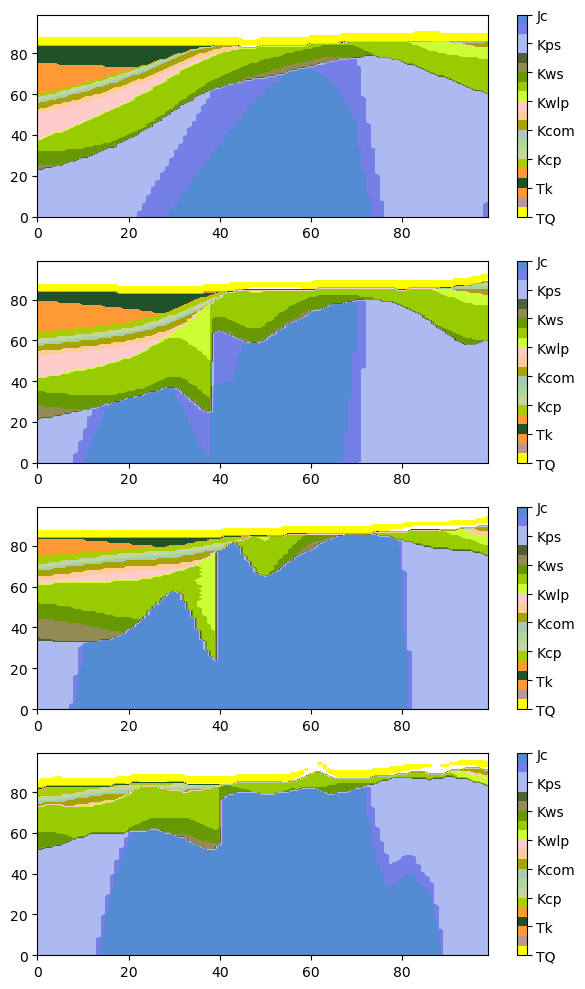

In [34]:
y_transects = [
    6505000,
    6515000,
    6525000,
    6532000,
]

delx, delz = 100, 100

x, z = np.linspace(x0, x1, delx), np.linspace(z0, z1, delz)

xx, zz = np.meshgrid(x, z)

V_strat_column = []

V_scalar_field = []
i = 0

plt.figure(figsize=(12, 10))

for i in range(4):

    yy = np.zeros_like(xx)

    yy[:] = y_transects[i]

    # X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

    # test = geomodel_strat_column.evaluate_feature_value(
    #     "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # # plt.imshow(vals2)

    V_strat_column.append(
        geomodel_strat_column.evaluate_model(
            np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
        ).reshape(np.shape(xx))
    )
    plt.subplot(4, 2, i * 2 + 2)
    # plt.contourf(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     10,
    # )
    # plt.contourf(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     10,
    # )
    plt.contourf(
        V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        colors=strat["color"][1:],
    )
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     [0],
    # )
    # # plt.contourf(
    # #     geomodel_strat_column.evaluate_feature_value(
    # #         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # #     ).reshape(np.shape(xx)),
    # #     10,
    # # )
    # # plt.contourf(
    # #     geomodel_strat_column['Fault'].displacementfeature.evaluate_value(
    # #         geomodel_strat_column.scale(np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T)
    # #     ).reshape(np.shape(xx)),
    # #     10,
    # # )
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "CoolUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     0,
    # )
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "WarnUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     0,
    # )
    # # plt.contourf(
    # #     geomodel_strat_column.evaluate_feature_value(
    # #         "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # #     ).reshape(np.shape(xx)),
    # #     0,
    # )
plt.tight_layout()

In [ ]:
vf = geomodel_strat_column["Fault"][1].vector_field()

In [ ]:
ps = geomodel_strat_column.data[["X", "Y", "Z"]].values
vf = geomodel_strat_column["Fault"][1].evaluate_gradient(ps)

In [ ]:
import pyvista as pv

points = pv.PolyData(vf.locations)
points.point_data.set_vectors(vf.vectors, "vectors")
geom = pv.Arrow()

In [ ]:
vectorfield = points.glyph(
    scale="vectors", orient="vectors", geom=geom, tolerance=0.05, factor=100
)

In [ ]:
stratigraphic_column["Yarragadee"]Z

{'Kpc': {'min': -1818,
  'max': inf,
  'id': 18,
  'color': [0.68, 0.73, 0.95],
  'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
 'Kps': {'min': -2090,
  'max': -1818,
  'id': 19,
  'color': [0.68, 0.73, 0.95],
  'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
 'Kpo': {'min': -2148,
  'max': -2090,
  'id': 20,
  'color': [0.46, 0.5, 0.9],
  'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
 'Jy': {'min': -3148,
  'max': -2148,
  'id': 21,
  'color': [0.33, 0.55, 0.83],
  'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}}

In [ ]:
import pyvista as pv

p = pv.Plotter(notebook=True)
p.add_mesh(
    geomodel_strat_column["Fault"].displacementfeature.scalar_field(
        geomodel_strat_column.bounding_box
    )
)
# p.add_mesh(geomodel_strat_column["Fault"][0].surfaces(0)[0].vtk)
# for u in stratigraphic_column["Yarragadee"].values():
#     print(u["min"])
#     p.add_mesh(geomodel_strat_column["Yarragadee"].surfaces([u['min']])[0].vtk)
# p.add_mesh(geomodel_strat_column['CoolUC'].surfaces(0)[0].vtk)
p.show()

Widget(value="<iframe src='http://localhost:63745/index.html?ui=P_0x14caa3cc890_28&reconnect=auto' style='widt…

In [ ]:
geomodel_strat_column["Yarragadee"].faults

[-----------------------------------------------------
 Fault 9 
 -----------------------------------------------------
 	1 regions
 	 	<bound method BaseFeature.__str__ of -----------------------------------------------------
 CoolUC_unconformity_inverse 7 
 -----------------------------------------------------
 	0 regions
 	0 faults.
 	Fault enabled True
 >
 	0 faults.
 	Fault enabled True]

In [ ]:
geomodel_strat_column["Yarragadee"].surfaces(
    (
        geomodel_strat_column["Yarragadee"].max()
        - geomodel_strat_column["Yarragadee"].min()
    )
    + geomodel_strat_column["Yarragadee"].min()
)

[Surface(vertices=array([[0.0000000e+00, 4.9000000e+04, 8.9600000e+02],
        [0.0000000e+00, 4.9000000e+04, 8.9600000e+02],
        [2.3832526e-05, 4.9000000e+04, 8.9600000e+02],
        [          nan,           nan,           nan]]), triangles=array([[2, 1, 0],
        [3, 2, 0]]), normals=array([[        nan,         nan,         nan],
        [ 0.9516978 , -0.28223392, -0.1208935 ],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]], dtype=float32), name='surface_-506.4206874871329', values=array([-506.42068749, -506.42068749, -506.42068749, -506.42068749]))]

In [ ]:
geomodel_strat_column["Yarragadee"].faults

[-----------------------------------------------------
 Fault 9 
 -----------------------------------------------------
 	1 regions
 	 	<bound method BaseFeature.__str__ of -----------------------------------------------------
 CoolUC_unconformity_inverse 7 
 -----------------------------------------------------
 	0 regions
 	0 faults.
 	Fault enabled True
 >
 	0 faults.
 	Fault enabled True]

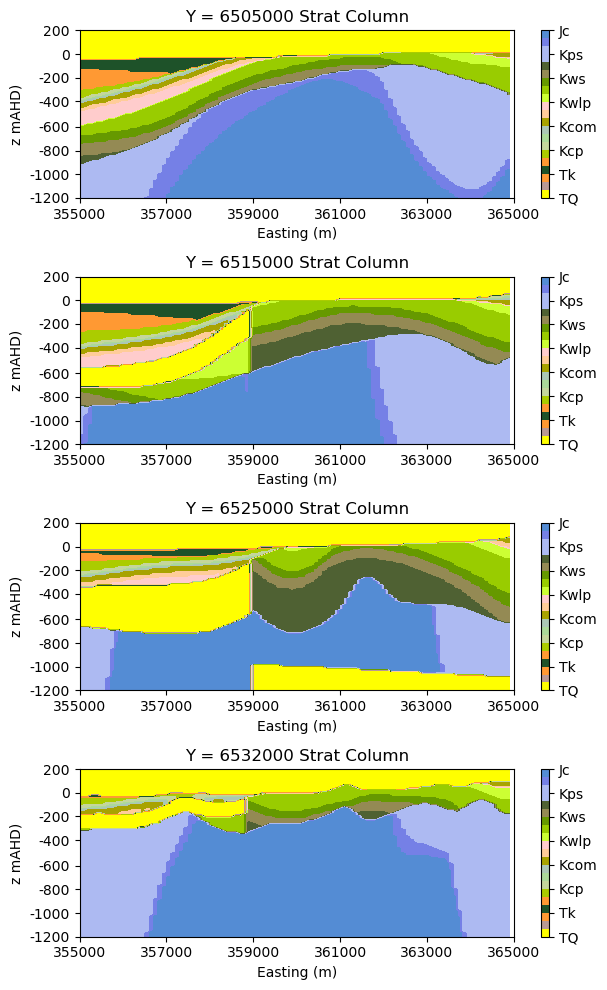

In [ ]:
# plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(12, 10))
for i in range(4):
    # plt.subplot(4, 2, i * 2 + 1)
    # plt.contourf(
    #     V_scalar_field[i],
    #     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    #     colors=strat["color"][1:],
    # )
    # cbar = plt.colorbar()
    # cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Scalar Field")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")

    plt.subplot(4, 2, i * 2 + 2)

    plt.contourf(
        V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        colors=strat["color"][1:],
    )
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    plt.xticks(
        [0, 20, 40, 60, 80, 100],
        [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    )
    plt.xlabel("Easting (m)")
    yticks = []
    yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    for ydum in yvals:
        n = np.argmin(abs(ydum - z))
        yticks.append(n)
    plt.yticks(yticks, yvals)
    plt.ylabel("z mAHD)")

plt.tight_layout()

In [ ]:
geomodel_strat_column["Yarragadee"].faults[0][0].regions = []
geomodel_strat_column["Yarragadee"].faults[0][1].regions = []
geomodel_strat_column["Yarragadee"].faults[0][2].regions = []

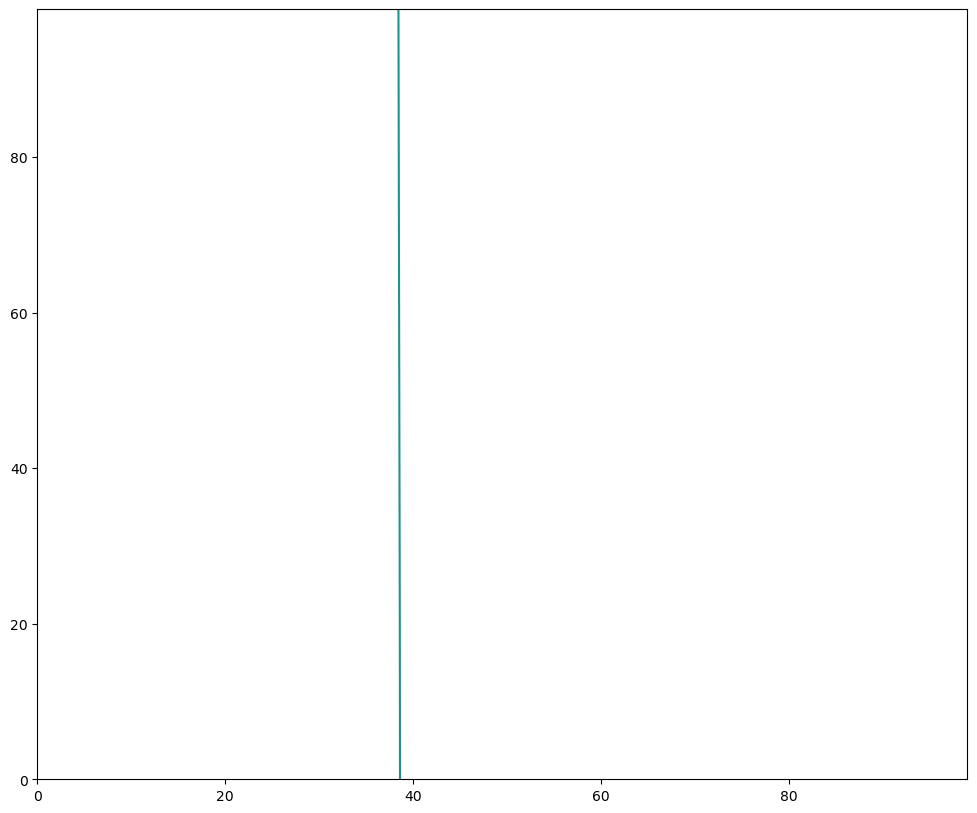

In [ ]:
plt.figure(figsize=(12, 10))
# plt.contourf(
#     V_strat_column[i],
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
#     colors=strat["color"][1:],
# )
plt.contour(
    geomodel_strat_column.evaluate_feature_value(
        "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    ).reshape(np.shape(xx)),
    0,
)

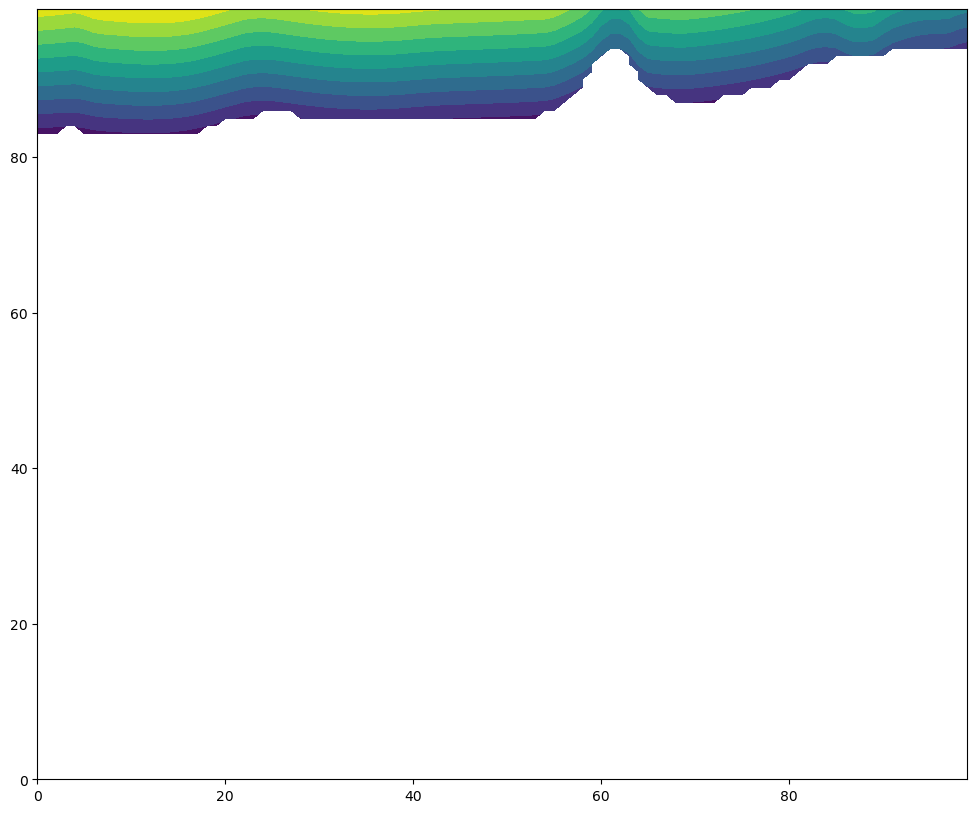

In [ ]:
plt.figure(figsize=(12, 10))
# plt.contourf(
#     V_strat_column[i],
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
#     colors=strat["color"][1:],
# )
plt.contourf(
    geomodel_strat_column.evaluate_feature_value(
        "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    ).reshape(np.shape(xx)),
    10,
)
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     [-10.],
# # )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# plt.contour(
#     geomodel_strat_column.evaluate_feature_value(
#         "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     5,
# )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Coolyena", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "CoolUC_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),

# # )
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     0,
# # )
# # plt.contourf(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     0,
# # )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# tmp = np.copy(valsa)
# tmp[valsb > 0] = np.nan
# plt.contour(valsb, 0,color='black')
# plt.contour(vals3, 0, color="black")
# plt.contour(vals5, 0, color="black")
# # plt.contourf(dum,5)

In [ ]:
raise Exception

Exception: 

In [ ]:
plt.contour(valsb, 0)
plt.contour(vals3, 0)
plt.contour(vals5, 0)

In [ ]:
geomodel_strat_column["Tertiary"].regions

In [ ]:
y_transects = [
    6505000,
    6515000,
    6525000,
    6532000,
]

delx, delz = 100, 100

x, z = np.linspace(x0, x1, delx), np.linspace(z0, z1, delz)

xx, zz = np.meshgrid(x, z)

V_strat_column = []

V_scalar_field = []

test_val = []
for i in range(4):
    yy = np.zeros_like(xx)

    yy[:] = y_transects[i]
    pts = np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    pts = geomodel_strat_column.rescale(pts)

    tertiary_unconformity = (
        geomodel_strat_column["Tertiary_unconformity"]
        .evaluate_value(pts)
        .reshape(np.shape(xx))
    )

    test_val.append(tertiary_unconformity)

    # # X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

    # vals1 = geomodel_scalar_field.evaluate_feature_value(
    #     "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # valsa = geomodel_scalar_field.evaluate_feature_value(
    #     "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # valsb = geomodel_scalar_field.evaluate_feature_value(
    #     "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals2 = geomodel_scalar_field.evaluate_feature_value(
    #     "Coolyena", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals3 = geomodel_scalar_field.evaluate_feature_value(
    #     "CoolUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals4 = geomodel_scalar_field.evaluate_feature_value(
    #     "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals5 = geomodel_scalar_field.evaluate_feature_value(
    #     "WarnUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals6 = geomodel_scalar_field.evaluate_feature_value(
    #     "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # # plt.imshow(vals2)

    # valsa[valsa > -10] = -10

    # valsa[valsa < -385] = -385

    # vals2[vals2 > -385] = -385

    # vals2[vals2 < -619] = -619

    # vals4[vals4 > -619] = -619

    # vals4[vals4 < -1043] = -1043

    # vals6[vals6 > -1043] = -1043

    # dum = np.ones_like(vals4) * -10000

    # dum[vals5 < 0] = vals6[vals5 < 0]

    # dum[vals5 > 0] = vals4[vals5 > 0]

    # dum[vals3 > 0] = vals2[vals3 > 0]

    # dum[valsb > 0] = valsa[valsb > 0]

    # dum[vals1 > -10] = vals1[vals1 > -10]

    # Lith = np.ones_like(dum) * -1

    # for i in range(len(vdum) - 2, -1, -1):

    #     Lith[dum > vdum[i]] = i

    # Lith[dum > 30.0] = 0

    V_scalar_field.append(Lith)

    V_strat_column.append(
        geomodel_strat_column.evaluate_model(
            np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
        ).reshape(np.shape(xx))
    )

In [ ]:
stratigraphic_column["Tertiary"]

In [ ]:
p = pv.Plotter()
p.add_mesh(model["Tertiary_unconformity"].surfaces(0)[0])
for unit in stratigraphic_column["Tertiary"].values():
    p.add_mesh(model[unit["feature"]].surfaces(0)[0])
p.set_scale(zscale=5)
p.show()

In [ ]:
test_val

In [ ]:
# plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(12, 10))
for i in range(4):
    # plt.subplot(4, 2, i * 2 + 1)
    # plt.contourf(
    #     V_scalar_field[i],
    #     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    #     colors=strat["color"][1:],
    # )
    # cbar = plt.colorbar()
    # cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Scalar Field")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")

    plt.subplot(4, 2, i * 2 + 2)
    plt.contour(test_val[i], levels=[0], colors="black")
    plt.contourf(
        V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        colors=strat["color"][1:],
    )
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    plt.xticks(
        [0, 20, 40, 60, 80, 100],
        [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    )
    plt.xlabel("Easting (m)")
    yticks = []
    yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    for ydum in yvals:
        n = np.argmin(abs(ydum - z))
        yticks.append(n)
    plt.yticks(yticks, yvals)
    plt.ylabel("z mAHD)")

plt.tight_layout()